## 高斯判别模型(GDA)
高斯判别模型作分类,假设有两类,则:
\begin{equation}
  y \sim Bernouli(\phi) \\
  x|y=0 \sim N(\mu_0, \Sigma) \\
  x|y=1 \sim N(\mu_1, \Sigma)
\end{equation}
令$\theta = (\phi, \mu_0, \mu_1, \Sigma)$,则参数的似然估计为:
\begin{align*}
L(\theta) &= log(\prod_{i=1}^m P(x^{(i)},y^{(i)})) \\
          &= log(\prod_{i=1}^m P(x^{(i)}|y^{(i)})P(y^{(i)})) \\
          &= \sum_{i=1}^m log(P(x^{(i)}|y^{(i)})) + \sum_{i=1}^m log (P(y^{(i)})) \\
          &= \sum_{i=1}^m (1-y^{(i)})log (P(x^{(i)}|y^{(i)} = 0)) + \sum_{i=1}^m y^{(i)}log(P(x^{(i)}|y^{(i)} = 1)) + \sum_{i=1}^m log(P(y^{(i)})) \\
\end{align*}

求参数的最大似然估计,$argmax_{\theta} L(\theta)$.
参数$\phi$:
\begin{align*}
\frac{\partial L(\theta)}{\partial \phi} &= \frac{\partial \sum_{i=1}^m log(P(y^{(i)}))}{\partial \phi} \\
                                         &= \frac{\partial \sum_{i=1}^m log(\phi^{y^{(i)}}(1-\phi)^{1-y^{(i)}})}{\partial \phi} \\
                                         &= \frac{\partial \sum_{i=1}^m y^{(i)}log(\phi) + (1-y^{(i)})log(1-\phi)}{\partial \phi} \\
                                         &= \sum_{i=1}^m y^{(i)} \frac{1}{\phi} - (1-y^{(i)}) \frac{1}{1-\phi} \\
                                         &= \sum_{i=1}^m I(y^{(i)}=1) \frac{1}{\phi} - I(y^{(i)}=0) \frac{1}{1-\phi} \\
                                         &= a \frac{1}{\phi} + b \frac{1}{1-\phi} \\
                                         &= 0
\end{align*}

$I$为指示函数,$a$为$(y^{(i)}=1)$的样本数量,$b$为$(y^{(i)}=0)$的样本数量,$a+b=m$,$m$为样本总数,令导数为0,则求得:
\begin{equation}
  \phi = \frac{I(y^{(i)}=1)}{m} = \frac{a}{m}
\end{equation}

求参数$\mu_0$:
\begin{align*}
\frac{\partial L(\theta)}{\partial \mu_0} &= \frac{\partial \sum_{i=1}^m (1-y^{(i)})log(P(x^{(i)}|y^{(i)} = 0)) }{\partial \mu_0} \\
                                          &= \frac{\partial \sum_{i=1}^m (1-y^{(i)})(log(\frac{1}{\sqrt{(2\pi)^l|\Sigma|}}) - \frac{1}{2}(x^{(i)} - \mu_0)|\Sigma|^{-1}(x^{(i)} - \mu_0)^T)}{\partial \mu_0} \\
                                          &= \sum_{i=1}^m (1 - y^{(i)})(\Sigma^{-1}(x^{(i)} - \mu_0)) \\
                                          &= \sum_{i=1}^m I(y^{(i)} = 0)(\Sigma^{-1}(x^{(i)} - \mu_0)) \\
                                          &= 0
\end{align*}

令导数为0,从而求得:
\begin{equation}
  \mu_0 = \frac{\sum_{i=1}^m I(y^{(i)}=0) x^{(i)}}{\sum_{i=1}^m I(y^{(i)}=0)}
\end{equation}

同理可求得参数$\mu_1$:
\begin{equation}
  \mu_1 = \frac{\sum_{i=1}^m I(y^{(i)}=1) x^{(i)}}{\sum_{i=1}^m I(y^{(i)}=1)}
\end{equation}

协方差矩阵$\Sigma$,$x$的维度为2,$P(x)$是一个2维高斯分布,
$x-\mu = [x_0,x_1] - [\mu_0,\mu_1]$

$\Sigma = E(x-\mu)^T(x-\mu)$:
\begin{align*}
\Sigma &=  \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu^{i})^T(x^{(i)} - \mu^{i})
\end{align*}

Text(0.5,1,'X_test')

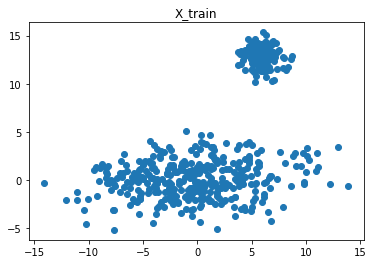

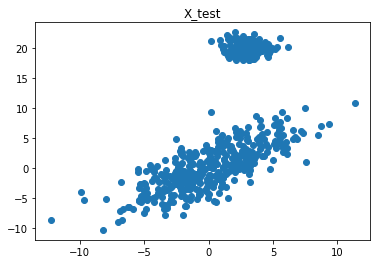

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m_samples = 500
t_samples = 200
np.random.seed(0)

# 平移从正态分布中采样的高斯样本,正态分布以0为中心
# 这是一个二维高斯,每一维加上其对应的均值,作为平移偏差
shifted_gaussian = np.random.randn(m_samples, 2) + np.array([6,13])
test_sample_1 = np.random.randn(t_samples, 2) + np.array([3,20])
y_label1 = np.zeros(m_samples)
test_label_1 = np.zeros(t_samples)
# 从正态分布采样数据,乘以协方差矩阵C,用以伸缩正态分布
C1 = np.array([[5, 0], [0.3, 2]])
C2 = np.array([[0.8, -1.68], [3.3, 3.2]])
stretched_gaussian = np.dot(np.random.randn(m_samples * 2, 2), C1)
test_sample_2 = np.dot(np.random.randn(t_samples * 2, 2), C2)
y_label2 = np.ones(m_samples * 2)
test_label_2 = np.ones(t_samples * 2)

X_train = np.vstack([shifted_gaussian, stretched_gaussian])
X_label = np.concatenate([y_label1, y_label2])
X_train_label = np.hstack([X_train, X_label.reshape(X_label.shape[0],1)])
idxs = xrange(X_train_label.shape[0])
idxs = np.random.choice(idxs, m_samples, replace=False)
X_train_label = X_train_label[idxs]

X_test = np.vstack([test_sample_1, test_sample_2])
X_test_label = np.concatenate([test_label_1, test_label_2])

plt.figure(1)
plt.scatter(X_train_label[:,0],X_train_label[:,1])
plt.title('X_train')
plt.figure(2)
plt.scatter(X_test[:,0], X_test[:,1])
plt.title('X_test')

('phi:', 0.702)
('mu0:', array([ 5.89459937, 12.82680614]))
('mu1:', array([-0.37690383,  0.07991086]))
('Sigma:', array([[17.11331917,  1.03148848],
       [ 1.03148848,  2.8622426 ]]))


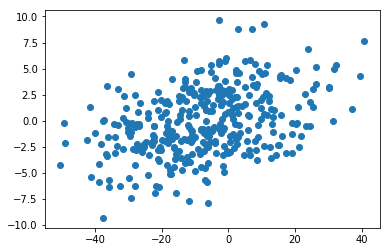

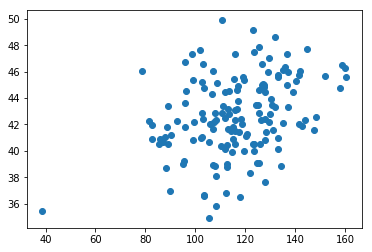

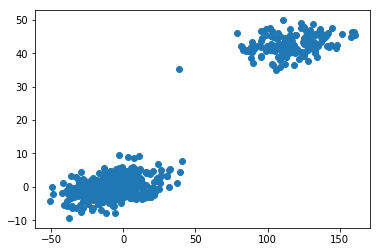

In [3]:
def trainGDA(X):
    m,D= X.shape
    D = D-1
    pos = X[X[:,2] == 1][:,:2]
    nag = X[X[:,2] == 0][:,:2]
    a = pos.shape[0]
    b = nag.shape[0]
    phi = float(a) / float(m)
    
    pos_sum = np.sum(pos, axis=0)
    nag_sum = np.sum(nag, axis=0)
    # [ 5.92345515 13.02799222]
    mu0 = nag_sum / float(b)
    # [0.18769247 0.10985849]
    mu1 = pos_sum / float(a)
    
    Sigma = np.zeros((D,D))
    for i in range(m):
        x = X[i,:2].reshape(1,D)
        if X[i,2] == 1.0 :
            Sigma += np.dot((x - mu1).T, (x - mu1))
        else:
            Sigma += np.dot((x - mu0).T, (x - mu0))
    Sigma = Sigma / m
    
    return (phi, mu0, mu1, Sigma)

phi,mu0,mu1,Sigma = trainGDA(X_train_label)
print('phi:',phi)
print('mu0:', mu0)
print('mu1:', mu1)
print('Sigma:', Sigma)

samples_num = 500
samples_num_1 = int(samples_num * phi)
samples_num_2 = int(samples_num * (1-phi))
sample_data_1 = np.random.randn(samples_num_1,2) + mu1
sample_data_1 = sample_data_1.dot(Sigma)
plt.figure(1)
plt.scatter(sample_data_1[:,0],sample_data_1[:,1])
sample_data_2 = np.random.randn(samples_num_2,2) + mu0
sample_data_2 = sample_data_2.dot(Sigma)
plt.figure(2)
plt.scatter(sample_data_2[:,0],sample_data_2[:,1])
sample_data = np.vstack([sample_data_1, sample_data_2])
plt.figure(3)
plt.scatter(sample_data[:,0],sample_data[:,1])

In [4]:
def prediction(X,phi,mu0,mu1,Sigma):
    m,D = X.shape
    
    # 求协方差矩阵的行列式
    sig_det = np.linalg.det(Sigma)
    
    # 求协方差矩阵的逆
    sig_inv = np.linalg.inv(Sigma)
    
    ce = X[1].reshape(1,D)
    div_val = 2 * np.pi * np.sqrt(sig_det)
    pre_label = []
    for i in range(m):
        x = X[i].reshape(1,D)
        time_inv_1 = np.dot(x - mu1, sig_inv)
        temp_val_1 = np.dot(time_inv_1, (x - mu1).T)
        time_inv_2 = np.dot(x - mu0, sig_inv)
        temp_val_2 = np.dot(time_inv_2, (x - mu0).T)
        pro_pos = (phi * np.exp(-0.5 * temp_val_1) / div_val).flatten()
        pro_nag = ((1-phi) * np.exp(-0.5 * temp_val_2) / div_val).flatten()
        if pro_pos > pro_nag:
            pre_label.append(1)
        else:
            pre_label.append(0)
            
    return pre_label
        
    
pre_label = prediction(X_test,phi,mu0,mu1,Sigma)
total_num = len(pre_label)
hit_num = X_test_label[X_test_label == pre_label].shape[0]
accuracy = float(hit_num) / float(total_num)
print('accuracy is %d %%' % (accuracy * 100))

accuracy is 97 %
